In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
season = 2023

season_url = f"https://www.basketball-reference.com/leagues/NBA_{season}_per_game.html"

tables = pd.read_html(season_url)

In [3]:
df_season = tables[0]
df_season

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Joel Embiid,28.0,PHI,C,66.0,66.0,34.6,11.0,20.1,...,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,"MVP-1,DPOY-9,CPOY-5,AS,NBA1"
1,2.0,Luka Dončić,23.0,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,"MVP-8,CPOY-8,AS,NBA1"
2,3.0,Damian Lillard,32.0,POR,PG,58.0,58.0,36.3,9.6,20.7,...,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,"CPOY-10,AS,NBA3"
3,4.0,Shai Gilgeous-Alexander,24.0,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,"MVP-5,CPOY-7,AS,NBA1"
4,5.0,Giannis Antetokounmpo,28.0,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,"MVP-3,DPOY-6,AS,NBA1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,536.0,Deonte Burton,29.0,SAC,PF,2.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
676,537.0,Michael Foster Jr.,20.0,PHI,PF,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
677,538.0,Frank Jackson,24.0,UTA,PG,1.0,0.0,5.0,0.0,3.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
678,539.0,Alondes Williams,23.0,BRK,SG,1.0,0.0,5.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN


In [4]:
#Keep only the top 100 entries
df_season.drop_duplicates(subset=['Player'], keep='first', inplace=True)
df_season

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Joel Embiid,28.0,PHI,C,66.0,66.0,34.6,11.0,20.1,...,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,"MVP-1,DPOY-9,CPOY-5,AS,NBA1"
1,2.0,Luka Dončić,23.0,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,"MVP-8,CPOY-8,AS,NBA1"
2,3.0,Damian Lillard,32.0,POR,PG,58.0,58.0,36.3,9.6,20.7,...,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,"CPOY-10,AS,NBA3"
3,4.0,Shai Gilgeous-Alexander,24.0,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,"MVP-5,CPOY-7,AS,NBA1"
4,5.0,Giannis Antetokounmpo,28.0,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,"MVP-3,DPOY-6,AS,NBA1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,536.0,Deonte Burton,29.0,SAC,PF,2.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
676,537.0,Michael Foster Jr.,20.0,PHI,PF,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
677,538.0,Frank Jackson,24.0,UTA,PG,1.0,0.0,5.0,0.0,3.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
678,539.0,Alondes Williams,23.0,BRK,SG,1.0,0.0,5.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN


In [5]:
df_season.drop(df_season.index[100: 541], inplace=True)
df_season.reset_index(inplace=True, drop=True)
df_season

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Joel Embiid,28.0,PHI,C,66.0,66.0,34.6,11.0,20.1,...,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,"MVP-1,DPOY-9,CPOY-5,AS,NBA1"
1,2.0,Luka Dončić,23.0,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,"MVP-8,CPOY-8,AS,NBA1"
2,3.0,Damian Lillard,32.0,POR,PG,58.0,58.0,36.3,9.6,20.7,...,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,"CPOY-10,AS,NBA3"
3,4.0,Shai Gilgeous-Alexander,24.0,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,"MVP-5,CPOY-7,AS,NBA1"
4,5.0,Giannis Antetokounmpo,28.0,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,"MVP-3,DPOY-6,AS,NBA1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,Harrison Barnes,30.0,SAC,PF,82.0,82.0,32.5,4.6,9.6,...,1.1,3.4,4.5,1.6,0.7,0.1,1.0,1.3,15.0,NaN
96,97.0,Malcolm Brogdon,30.0,BOS,PG,67.0,0.0,26.0,5.3,10.9,...,0.6,3.6,4.2,3.7,0.7,0.3,1.5,1.6,14.9,6MOY-1
97,98.0,Immanuel Quickley,23.0,NYK,SG,81.0,21.0,28.9,5.2,11.6,...,0.7,3.4,4.2,3.4,1.0,0.2,1.2,2.0,14.9,6MOY-2
98,99.0,Alperen Şengün,20.0,HOU,C,75.0,72.0,28.9,5.9,10.7,...,3.2,5.8,9.0,3.9,0.9,0.9,2.6,3.4,14.8,NaN


In [6]:
standings_url = f"https://www.basketball-reference.com/leagues/NBA_{season}_standings.html"

tables_team = pd.read_html(standings_url)

In [7]:
df_east = tables_team[0]
df_west = tables_team[1]

In [8]:
df_east['Eastern Conference'] = df_east['Eastern Conference'].str.replace('*', '')
df_west['Western Conference'] = df_west['Western Conference'].str.replace('*', '')
df_east = df_east.rename({'Eastern Conference': 'Team'}, axis=1)
df_west = df_west.rename({'Western Conference': 'Team'}, axis=1)

In [9]:
df_east = df_east[['Team', 'W/L%']]
df_west = df_west[['Team', 'W/L%']]

In [10]:
df_east = df_east.replace({'Milwaukee Bucks': 'MIL',
                 'Boston Celtics': 'BOS',
                 'Philadelphia 76ers': 'PHI',
                 'Cleveland Cavaliers': 'CLE',
                 'New York Knicks': 'NYK',
                 'Brooklyn Nets': 'BRK',
                 'Miami Heat': 'MIA',
                 'Atlanta Hawks': 'ATL',
                 'Toronto Raptors': 'TOR',
                 'Chicago Bulls': 'CHI',
                 'Indiana Pacers': 'IND',
                 'Washington Wizards': 'WAS',
                 'Orlando Magic': 'ORL',
                 'Charlotte Hornets': 'CHO',
                 'Detroit Pistons': 'DET'})

In [11]:
df_west = df_west.replace({'Denver Nuggets': 'DEN',
                 'Memphis Grizzlies': 'MEM',
                 'Sacramento Kings': 'SAC',
                 'Phoenix Suns': 'PHO',
                 'Los Angeles Clippers': 'LAC',
                 'Golden State Warriors': 'GSW',
                 'Los Angeles Lakers': 'LAL',
                 'Minnesota Timberwolves': 'MIN',
                 'New Orleans Pelicans': 'NOP',
                 'Oklahoma City Thunder': 'OKC',
                 'Dallas Mavericks': 'DAL',
                 'Utah Jazz': 'UTA',
                 'Portland Trail Blazers': 'POR',
                 'Houston Rockets': 'HOU',
                 'San Antonio Spurs': 'SAS'})

In [12]:
df_team = pd.concat([df_west, df_east])

In [13]:
df_season = df_season.merge(df_team, how='left', on='Team')
df_season

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,W/L%
0,1.0,Joel Embiid,28.0,PHI,C,66.0,66.0,34.6,11.0,20.1,...,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,"MVP-1,DPOY-9,CPOY-5,AS,NBA1",0.659
1,2.0,Luka Dončić,23.0,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,"MVP-8,CPOY-8,AS,NBA1",0.463
2,3.0,Damian Lillard,32.0,POR,PG,58.0,58.0,36.3,9.6,20.7,...,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,"CPOY-10,AS,NBA3",0.402
3,4.0,Shai Gilgeous-Alexander,24.0,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,"MVP-5,CPOY-7,AS,NBA1",0.488
4,5.0,Giannis Antetokounmpo,28.0,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,"MVP-3,DPOY-6,AS,NBA1",0.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,Harrison Barnes,30.0,SAC,PF,82.0,82.0,32.5,4.6,9.6,...,3.4,4.5,1.6,0.7,0.1,1.0,1.3,15.0,NaN,0.585
96,97.0,Malcolm Brogdon,30.0,BOS,PG,67.0,0.0,26.0,5.3,10.9,...,3.6,4.2,3.7,0.7,0.3,1.5,1.6,14.9,6MOY-1,0.695
97,98.0,Immanuel Quickley,23.0,NYK,SG,81.0,21.0,28.9,5.2,11.6,...,3.4,4.2,3.4,1.0,0.2,1.2,2.0,14.9,6MOY-2,0.573
98,99.0,Alperen Şengün,20.0,HOU,C,75.0,72.0,28.9,5.9,10.7,...,5.8,9.0,3.9,0.9,0.9,2.6,3.4,14.8,NaN,0.268


In [14]:
df_season['W/L%'] = df_season['W/L%'].fillna(0.5)

In [15]:
df_season.drop(['Rk', 'Age', 'Team', 'Pos', 'G', 'GS', 'FG', 'FGA', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TOV', 'PF', 'Awards'],
              axis=1, inplace=True)
df_season

,Player,MP,FG%,TRB,AST,STL,BLK,PTS,W/L%
0,Joel Embiid,34.6,0.548,10.2,4.2,1.0,1.7,33.1,0.659
1,Luka Dončić,36.2,0.496,8.6,8.0,1.4,0.5,32.4,0.463
2,Damian Lillard,36.3,0.463,4.8,7.3,0.9,0.3,32.2,0.402
3,Shai Gilgeous-Alexander,35.5,0.510,4.8,5.5,1.6,1.0,31.4,0.488
4,Giannis Antetokounmpo,32.1,0.553,11.8,5.7,0.8,0.8,31.1,0.707
...,...,...,...,...,...,...,...,...,...
95,Harrison Barnes,32.5,0.473,4.5,1.6,0.7,0.1,15.0,0.585
96,Malcolm Brogdon,26.0,0.484,4.2,3.7,0.7,0.3,14.9,0.695
97,Immanuel Quickley,28.9,0.448,4.2,3.4,1.0,0.2,14.9,0.573
98,Alperen Şengün,28.9,0.553,9.0,3.9,0.9,0.9,14.8,0.268


In [16]:
advanced_url = f"https://www.basketball-reference.com/leagues/NBA_{season}_advanced.html"

tables_adv = pd.read_html(advanced_url)

In [17]:
df_advanced = tables_adv[0]
df_advanced

,Rk,Player,Age,Team,Pos,G,GS,MP,PER,TS%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards
0,1.0,Mikal Bridges,26.0,2TM,SG,83.0,83.0,2963.0,16.8,0.587,...,22.6,4.4,3.1,7.5,0.121,1.5,0.2,1.7,2.8,NaN
1,1.0,Mikal Bridges,26.0,PHO,SF,56.0,56.0,2040.0,14.8,0.574,...,19.2,2.7,2.2,4.9,0.116,0.4,0.6,1.0,1.6,NaN
2,1.0,Mikal Bridges,26.0,BRK,SG,27.0,27.0,923.0,21.3,0.607,...,30.3,1.7,0.8,2.5,0.133,4.0,-0.8,3.3,1.2,NaN
3,2.0,Anthony Edwards,21.0,MIN,SG,79.0,79.0,2842.0,17.4,0.564,...,29.9,0.2,3.6,3.8,0.064,1.0,0.0,1.0,2.1,AS
4,3.0,Zach LaVine,27.0,CHI,SG,77.0,77.0,2768.0,19.0,0.607,...,28.3,4.2,2.9,7.1,0.123,2.7,-0.7,1.9,2.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,536.0,Donovan Williams,21.0,ATL,SG,2.0,0.0,4.0,14.5,0.400,...,52.5,0.0,0.0,0.0,-0.225,-9.1,-6.1,-15.2,0.0,NaN
676,537.0,Chris Silva,26.0,DAL,PF,1.0,0.0,3.0,-2.2,1.000,...,30.1,0.0,0.0,0.0,-0.260,-22.5,-0.1,-22.6,0.0,NaN
677,538.0,Stanley Umude,23.0,DET,SG,1.0,0.0,2.0,65.6,0.532,...,40.0,0.0,0.0,0.0,0.626,15.9,32.7,48.6,0.0,NaN
678,539.0,Michael Foster Jr.,20.0,PHI,PF,1.0,0.0,1.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.010,-7.2,-1.9,-9.2,0.0,NaN


In [18]:
df_advanced.drop_duplicates(subset=['Player'], keep='first', inplace=True)
df_advanced

,Rk,Player,Age,Team,Pos,G,GS,MP,PER,TS%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards
0,1.0,Mikal Bridges,26.0,2TM,SG,83.0,83.0,2963.0,16.8,0.587,...,22.6,4.4,3.1,7.5,0.121,1.5,0.2,1.7,2.8,NaN
3,2.0,Anthony Edwards,21.0,MIN,SG,79.0,79.0,2842.0,17.4,0.564,...,29.9,0.2,3.6,3.8,0.064,1.0,0.0,1.0,2.1,AS
4,3.0,Zach LaVine,27.0,CHI,SG,77.0,77.0,2768.0,19.0,0.607,...,28.3,4.2,2.9,7.1,0.123,2.7,-0.7,1.9,2.7,NaN
5,4.0,Nikola Vučević,32.0,CHI,C,82.0,82.0,2746.0,19.1,0.594,...,21.9,3.9,4.4,8.3,0.145,1.9,0.7,2.7,3.2,NaN
6,5.0,Julius Randle,28.0,NYK,PF,77.0,77.0,2737.0,20.3,0.581,...,29.5,5.0,3.1,8.1,0.142,3.9,-0.2,3.7,3.9,"CPOY-14,AS,NBA3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,536.0,Donovan Williams,21.0,ATL,SG,2.0,0.0,4.0,14.5,0.400,...,52.5,0.0,0.0,0.0,-0.225,-9.1,-6.1,-15.2,0.0,NaN
676,537.0,Chris Silva,26.0,DAL,PF,1.0,0.0,3.0,-2.2,1.000,...,30.1,0.0,0.0,0.0,-0.260,-22.5,-0.1,-22.6,0.0,NaN
677,538.0,Stanley Umude,23.0,DET,SG,1.0,0.0,2.0,65.6,0.532,...,40.0,0.0,0.0,0.0,0.626,15.9,32.7,48.6,0.0,NaN
678,539.0,Michael Foster Jr.,20.0,PHI,PF,1.0,0.0,1.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.010,-7.2,-1.9,-9.2,0.0,NaN


In [19]:
df_advanced.drop(['Rk', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
                 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'Awards'],
              axis=1, inplace=True)
df_advanced

,Player,PER,TS%,USG%,WS,BPM,VORP
0,Mikal Bridges,16.8,0.587,22.6,7.5,1.7,2.8
3,Anthony Edwards,17.4,0.564,29.9,3.8,1.0,2.1
4,Zach LaVine,19.0,0.607,28.3,7.1,1.9,2.7
5,Nikola Vučević,19.1,0.594,21.9,8.3,2.7,3.2
6,Julius Randle,20.3,0.581,29.5,8.1,3.7,3.9
...,...,...,...,...,...,...,...
675,Donovan Williams,14.5,0.400,52.5,0.0,-15.2,0.0
676,Chris Silva,-2.2,1.000,30.1,0.0,-22.6,0.0
677,Stanley Umude,65.6,0.532,40.0,0.0,48.6,0.0
678,Michael Foster Jr.,0.0,NaN,0.0,0.0,-9.2,0.0


In [20]:
df_season = df_season.merge(df_advanced, how='inner', on='Player')
df_season

,Player,MP,FG%,TRB,AST,STL,BLK,PTS,W/L%,PER,TS%,USG%,WS,BPM,VORP
0,Joel Embiid,34.6,0.548,10.2,4.2,1.0,1.7,33.1,0.659,31.4,0.655,37.0,12.3,9.2,6.4
1,Luka Dončić,36.2,0.496,8.6,8.0,1.4,0.5,32.4,0.463,28.7,0.609,37.6,10.2,8.9,6.6
2,Damian Lillard,36.3,0.463,4.8,7.3,0.9,0.3,32.2,0.402,26.7,0.645,33.8,9.0,7.1,4.9
3,Shai Gilgeous-Alexander,35.5,0.510,4.8,5.5,1.6,1.0,31.4,0.488,27.2,0.626,32.8,11.4,7.3,5.6
4,Giannis Antetokounmpo,32.1,0.553,11.8,5.7,0.8,0.8,31.1,0.707,29.0,0.605,38.8,8.6,8.5,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Harrison Barnes,32.5,0.473,4.5,1.6,0.7,0.1,15.0,0.585,14.1,0.632,17.1,6.5,-1.0,0.7
96,Malcolm Brogdon,26.0,0.484,4.2,3.7,0.7,0.3,14.9,0.695,18.2,0.615,22.8,5.8,2.8,2.1
97,Immanuel Quickley,28.9,0.448,4.2,3.4,1.0,0.2,14.9,0.573,16.3,0.578,20.9,6.7,1.7,2.1
98,Alperen Şengün,28.9,0.553,9.0,3.9,0.9,0.9,14.8,0.268,19.7,0.599,21.4,5.2,1.4,1.9


In [21]:
df_season.isna().sum()

Player    0
MP        0
FG%       0
TRB       0
AST       0
STL       0
BLK       0
PTS       0
W/L%      0
PER       0
TS%       0
USG%      0
WS        0
BPM       0
VORP      0
dtype: int64

In [22]:
mvp_url = f"https://www.basketball-reference.com/awards/awards_{season}.html"

tables_mvp = pd.read_html(mvp_url)

In [23]:
df_mvp = tables_mvp[0]
df_mvp

Unnamed: 0_level_0       Unnamed: 1_level_0 Unnamed: 2_level_0  \
                 Rank                   Player                Age   
0                   1              Joel Embiid                 28   
1                   2             Nikola Jokić                 27   
2                   3    Giannis Antetokounmpo                 28   
3                   4             Jayson Tatum                 24   
4                   5  Shai Gilgeous-Alexander                 24   
5                   6         Donovan Mitchell                 26   
6                   7         Domantas Sabonis                 26   
7                   8              Luka Dončić                 23   
8                   9            Stephen Curry                 34   
9                  10             Jimmy Butler                 33   
10                 11             De'Aaron Fox                 25   
11                12T            Jalen Brunson                 26   
12                12T                Ja Morant                 23   

   Unnamed: 3_level_0 Voting                        Unnamed: 8_level_0  \
                   Tm  First Pts Won Pts Max  Share                  G   
0                 PHI     73     915    1000  0.915                 66   
1                 DEN     15     674    1000  0.674                 69   
2                 MIL     12     606    1000  0.606                 63   
3                 BOS      0     280    1000  0.280                 74   
4                 OKC      0      46    1000  0.046                 68   
5                 CLE      0      30    1000  0.030                 68   
6                 SAC      0      27    1000  0.027                 79   
7                 DAL      0      10    1000  0.010                 66   
8                 GSW      0       5    1000  0.005                 56   
9                 MIA      0       3    1000  0.003                 64   
10                SAC      0       2    1000  0.002                 73   
11                NYK      0       1    1000  0.001                 68   
12                MEM      0       1    1000  0.001                 61   

   Per Game                            Shooting               Advanced         
         MP   PTS   TRB  AST  STL  BLK      FG%    3P%    FT%       WS  WS/48  
0      34.6  33.1  10.2  4.2  1.0  1.7    0.548  0.330  0.857     12.3  0.259  
1      33.7  24.5  11.8  9.8  1.3  0.7    0.632  0.383  0.822     14.9  0.308  
2      32.1  31.1  11.8  5.7  0.8  0.8    0.553  0.275  0.645      8.6  0.204  
3      36.9  30.1   8.8  4.6  1.1  0.7    0.466  0.350  0.854     10.5  0.185  
4      35.5  31.4   4.8  5.5  1.6  1.0    0.510  0.345  0.905     11.4  0.226  
5      35.8  28.3   4.3  4.4  1.5  0.4    0.484  0.386  0.867      8.9  0.176  
6      34.6  19.1  12.3  7.3  0.8  0.5    0.615  0.373  0.742     12.6  0.221  
7      36.2  32.4   8.6  8.0  1.4  0.5    0.496  0.342  0.742     10.2  0.204  
8      34.7  29.4   6.1  6.3  0.9  0.4    0.493  0.427  0.915      7.8  0.192  
9      33.4  22.9   5.9  5.3  1.8  0.3    0.539  0.350  0.850     12.3  0.277  
10     33.4  25.0   4.2  6.1  1.1  0.3    0.512  0.324  0.780      7.4  0.146  
11     35.0  24.0   3.5  6.2  0.9  0.2    0.491  0.416  0.829      8.7  0.175  
12     31.9  26.2   5.9  8.1  1.1  0.3    0.466  0.307  0.748      6.0  0.148

In [24]:
df_mvp = df_mvp.set_axis(['rank', 'Player', 'Age', 'Team', 'First', 'Pts Won', 'Pts Max', 'Share', 'G', 'MP', 'PTS',
                 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48'], 
                  axis=1)
df_mvp

,rank,Player,Age,Team,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Joel Embiid,28,PHI,73,915,1000,0.915,66,34.6,33.1,10.2,4.2,1.0,1.7,0.548,0.330,0.857,12.3,0.259
1,2,Nikola Jokić,27,DEN,15,674,1000,0.674,69,33.7,24.5,11.8,9.8,1.3,0.7,0.632,0.383,0.822,14.9,0.308
2,3,Giannis Antetokounmpo,28,MIL,12,606,1000,0.606,63,32.1,31.1,11.8,5.7,0.8,0.8,0.553,0.275,0.645,8.6,0.204
3,4,Jayson Tatum,24,BOS,0,280,1000,0.280,74,36.9,30.1,8.8,4.6,1.1,0.7,0.466,0.350,0.854,10.5,0.185
4,5,Shai Gilgeous-Alexander,24,OKC,0,46,1000,0.046,68,35.5,31.4,4.8,5.5,1.6,1.0,0.510,0.345,0.905,11.4,0.226
5,6,Donovan Mitchell,26,CLE,0,30,1000,0.030,68,35.8,28.3,4.3,4.4,1.5,0.4,0.484,0.386,0.867,8.9,0.176
6,7,Domantas Sabonis,26,SAC,0,27,1000,0.027,79,34.6,19.1,12.3,7.3,0.8,0.5,0.615,0.373,0.742,12.6,0.221
7,8,Luka Dončić,23,DAL,0,10,1000,0.010,66,36.2,32.4,8.6,8.0,1.4,0.5,0.496,0.342,0.742,10.2,0.204
8,9,Stephen Curry,34,GSW,0,5,1000,0.005,56,34.7,29.4,6.1,6.3,0.9,0.4,0.493,0.427,0.915,7.8,0.192
9,10,Jimmy Butler,33,MIA,0,3,1000,0.003,64,33.4,22.9,5.9,5.3,1.8,0.3,0.539,0.350,0.850,12.3,0.277


In [25]:
df_mvp.drop(['rank', 'Age', 'Team', 'First', 'Pts Won', 'Pts Max', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48'],
              axis=1, inplace=True)
df_mvp

,Player,Share
0,Joel Embiid,0.915
1,Nikola Jokić,0.674
2,Giannis Antetokounmpo,0.606
3,Jayson Tatum,0.280
4,Shai Gilgeous-Alexander,0.046
5,Donovan Mitchell,0.030
6,Domantas Sabonis,0.027
7,Luka Dončić,0.010
8,Stephen Curry,0.005
9,Jimmy Butler,0.003


In [62]:
df_season = df_season.merge(df_mvp, how='left', on='Player')
df_season = df_season.fillna(0)
df_season['Season'] = season
df_season

,Player,MP,PTS,AST,TRB,STL,BLK,TS%,PER,WS,BPM,VORP,USG%,W/L%,Share_x,Share_y,Season
0,Joel Embiid,34.6,33.1,4.2,10.2,1.0,1.7,0.655,31.4,12.3,9.2,6.4,37.0,0.659,0.915,0.915,2023
1,Luka Dončić,36.2,32.4,8.0,8.6,1.4,0.5,0.609,28.7,10.2,8.9,6.6,37.6,0.463,0.010,0.010,2023
2,Damian Lillard,36.3,32.2,7.3,4.8,0.9,0.3,0.645,26.7,9.0,7.1,4.9,33.8,0.402,0.000,0.000,2023
3,Shai Gilgeous-Alexander,35.5,31.4,5.5,4.8,1.6,1.0,0.626,27.2,11.4,7.3,5.6,32.8,0.488,0.046,0.046,2023
4,Giannis Antetokounmpo,32.1,31.1,5.7,11.8,0.8,0.8,0.605,29.0,8.6,8.5,5.4,38.8,0.707,0.606,0.606,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Harrison Barnes,32.5,15.0,1.6,4.5,0.7,0.1,0.632,14.1,6.5,-1.0,0.7,17.1,0.585,0.000,0.000,2023
96,Malcolm Brogdon,26.0,14.9,3.7,4.2,0.7,0.3,0.615,18.2,5.8,2.8,2.1,22.8,0.695,0.000,0.000,2023
97,Immanuel Quickley,28.9,14.9,3.4,4.2,1.0,0.2,0.578,16.3,6.7,1.7,2.1,20.9,0.573,0.000,0.000,2023
98,Alperen Şengün,28.9,14.8,3.9,9.0,0.9,0.9,0.599,19.7,5.2,1.4,1.9,21.4,0.268,0.000,0.000,2023


In [63]:
df_season = df_season[['Season', 'Player', 'MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TS%', 'PER', 'WS', 'BPM', 'VORP', 'USG%', 'W/L%', 'Share']]

KeyError: "['Share'] not in index"

In [28]:
df_season.select_dtypes(include=['int64', 'float64']).corr()

,MP,PTS,AST,TRB,STL,BLK,TS%,PER,WS,BPM,VORP,USG%,W/L%,Share
MP,1.000000,0.592720,0.421584,0.119901,0.325945,-0.076481,-0.091605,0.229229,0.322194,0.264550,0.382209,0.348976,-0.064696,0.074739
PTS,0.592720,1.000000,0.363592,0.231483,0.239003,0.036970,0.246682,0.724908,0.475243,0.664732,0.653546,0.891259,0.104467,0.377122
AST,0.421584,0.363592,1.000000,0.003954,0.296054,-0.273806,-0.058146,0.383169,0.246637,0.443359,0.450741,0.399225,0.045530,0.146086
TRB,0.119901,0.231483,0.003954,1.000000,-0.162527,0.490812,0.282539,0.514092,0.442973,0.455876,0.475768,0.177208,0.172814,0.418073
STL,0.325945,0.239003,0.296054,-0.162527,1.000000,-0.106258,-0.039479,0.262095,0.292352,0.379614,0.387562,0.132881,0.012326,0.054102
BLK,-0.076481,0.036970,-0.273806,0.490812,-0.106258,1.000000,0.258636,0.307709,0.280992,0.232517,0.224455,-0.040884,0.131667,0.201536
TS%,-0.091605,0.246682,-0.058146,0.282539,-0.039479,0.258636,1.000000,0.637778,0.520000,0.602620,0.497939,-0.008409,0.369567,0.270475
PER,0.229229,0.724908,0.383169,0.514092,0.262095,0.307709,0.637778,1.000000,0.761066,0.945786,0.882445,0.585952,0.335154,0.504126
WS,0.322194,0.475243,0.246637,0.442973,0.292352,0.280992,0.520000,0.761066,1.000000,0.803928,0.911891,0.236588,0.468174,0.428450
BPM,0.264550,0.664732,0.443359,0.455876,0.379614,0.232517,0.602620,0.945786,0.803928,1.000000,0.947347,0.498135,0.369037,0.480543


<Axes: >

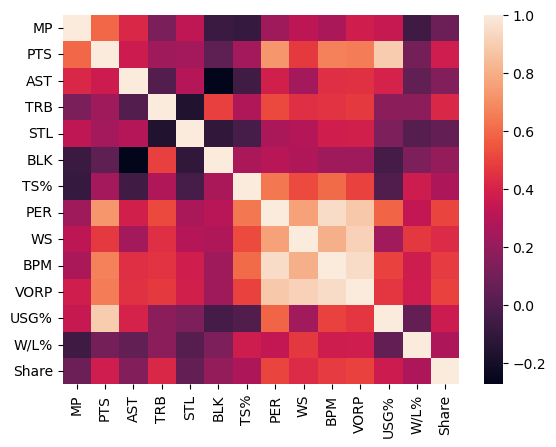

In [29]:
sns.heatmap(df_season.select_dtypes(include=['int64', 'float64']).corr())

<Axes: xlabel='VORP', ylabel='Share'>

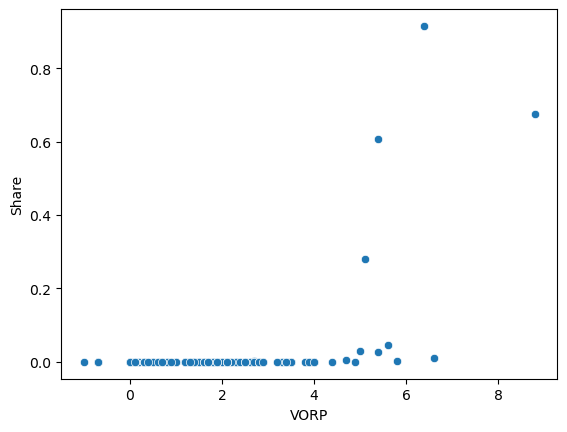

In [33]:
sns.scatterplot(data=df_season, x='VORP', y='Share')

In [31]:
df_select = df_season.sort_values(by=['Share'], ascending=False).drop(df_season.index[30: 101])

<Axes: >

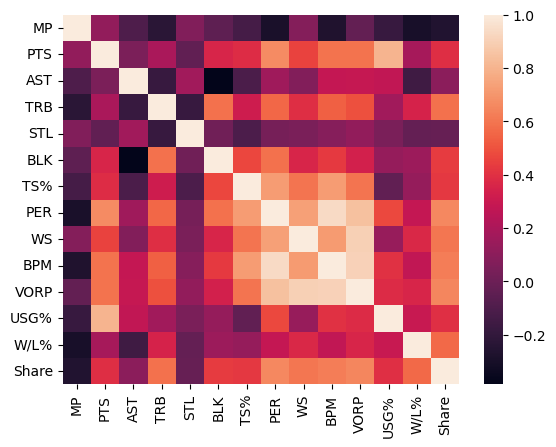

In [37]:
sns.heatmap(data=df_select.select_dtypes(include=['int64', 'float64']).corr())

<Axes: xlabel='PER', ylabel='Share'>

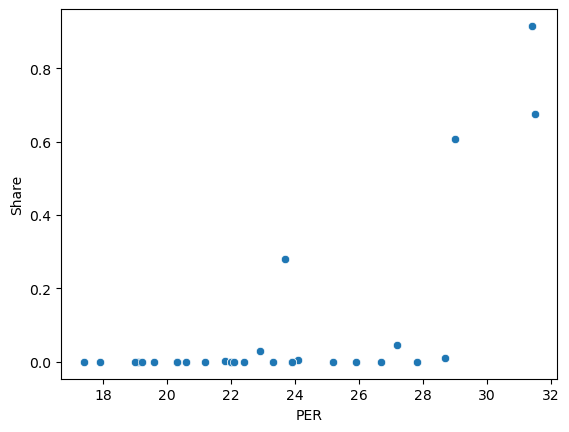

In [40]:
sns.scatterplot(data=df_select, x='PER', y='Share')

In [76]:
import time

In [216]:
#Method for getting season stats
def get_season_data(season, sample=False):
    #Player season stats
    season_url = f"https://www.basketball-reference.com/leagues/NBA_{season}_per_game.html"
    tables = pd.read_html(season_url)

    df_season = tables[0]
    
    df_season.drop_duplicates(subset=['Player'], keep='first', inplace=True) 
    df_season.drop(df_season.tail(1).index,inplace=True)
    df_season.reset_index(inplace=True, drop=True)

    #Sleep to avoid request limit
    time.sleep(5)
    
    #Team standings stats
    standings_url = f"https://www.basketball-reference.com/leagues/NBA_{season}_standings.html"
    tables_team = pd.read_html(standings_url)

    df_east = tables_team[0]
    df_west = tables_team[1]

    df_east['Eastern Conference'] = df_east['Eastern Conference'].str.replace('*', '')
    df_west['Western Conference'] = df_west['Western Conference'].str.replace('*', '')
    df_east = df_east.rename({'Eastern Conference': 'Team'}, axis=1)
    df_west = df_west.rename({'Western Conference': 'Team'}, axis=1)
    df_east = df_east[['Team', 'W/L%']]
    df_west = df_west[['Team', 'W/L%']]

    df_east = df_east.replace({'Milwaukee Bucks': 'MIL',
                 'Boston Celtics': 'BOS',
                 'Philadelphia 76ers': 'PHI',
                 'Cleveland Cavaliers': 'CLE',
                 'New York Knicks': 'NYK',
                 'Brooklyn Nets': 'BRK',
                 'Miami Heat': 'MIA',
                 'Atlanta Hawks': 'ATL',
                 'Toronto Raptors': 'TOR',
                 'Chicago Bulls': 'CHI',
                 'Indiana Pacers': 'IND',
                 'Washington Wizards': 'WAS',
                 'Orlando Magic': 'ORL',
                 'Charlotte Hornets': 'CHO',
                 'Detroit Pistons': 'DET'})
    df_west = df_west.replace({'Denver Nuggets': 'DEN',
                 'Memphis Grizzlies': 'MEM',
                 'Sacramento Kings': 'SAC',
                 'Phoenix Suns': 'PHO',
                 'Los Angeles Clippers': 'LAC',
                 'Golden State Warriors': 'GSW',
                 'Los Angeles Lakers': 'LAL',
                 'Minnesota Timberwolves': 'MIN',
                 'New Orleans Pelicans': 'NOP',
                 'Oklahoma City Thunder': 'OKC',
                 'Dallas Mavericks': 'DAL',
                 'Utah Jazz': 'UTA',
                 'Portland Trail Blazers': 'POR',
                 'Houston Rockets': 'HOU',
                 'San Antonio Spurs': 'SAS'})
    
    df_team = pd.concat([df_west, df_east])    
    df_season = df_season.merge(df_team, how='left', on='Team')
    
    df_season['W/L%'] = df_season['W/L%'].fillna(0.5)
    df_season.drop(['Rk', 'Age', 'Team', 'Pos', 'G', 'GS', 'FG', 'FGA', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                    'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TOV', 'PF', 'Awards'],
                     axis=1, inplace=True)

    #Sleep to avoid request limit
    time.sleep(5)
    
    #Advanced stats
    advanced_url = f"https://www.basketball-reference.com/leagues/NBA_{season}_advanced.html"
    tables_adv = pd.read_html(advanced_url)

    df_advanced = tables_adv[0]
    
    df_advanced.drop_duplicates(subset=['Player'], keep='first', inplace=True)
    df_advanced.drop(['Rk', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
                      'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'Awards'],
                       axis=1, inplace=True)

    df_season = df_season.merge(df_advanced, how='inner', on='Player')
    df_season.dropna()

    #Sleep to avoid request limit
    time.sleep(5)
    
    mvp_url = f"https://www.basketball-reference.com/awards/awards_{season}.html"
    tables_mvp = pd.read_html(mvp_url)

    df_mvp = tables_mvp[0]
    df_mvp = df_mvp.set_axis(['rank', 'Player', 'Age', 'Team', 'First', 'Pts Won', 'Pts Max', 'Share', 'G', 'MP', 'PTS',
                              'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48'], 
                               axis=1)
    df_mvp.drop(['rank', 'Age', 'Team', 'First', 'Pts Won', 'Pts Max', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK',
                 'FG%', '3P%', 'FT%', 'WS', 'WS/48'],
                  axis=1, inplace=True)

    df_season = df_season.merge(df_mvp, how='left', on='Player')
    df_season = df_season.fillna(0)
    df_season['Season'] = season
    df_season = df_season[['Season', 'Player', 'MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TS%', 'PER', 'WS', 'BPM', 'VORP', 'USG%', 'W/L%', 'Share']]

    #Sample only a certain amount of zero vote players
    if (sample):
        sample_size = 30
        df_list = []
        
        zero_votes = df_season[df_season["Share"] == 0]
        positive_votes = df_season[df_season["Share"] > 0]
    
        # sample zero-vote players
        sampled_zeros = zero_votes.sample(min(len(zero_votes), sample_size), random_state=42)
    
        # keep all positive voters
        df_season = pd.concat([positive_votes, sampled_zeros], axis=0)

    #Sleep to avoid request limit
    print('Sleeping', season)
    time.sleep(5)
    
    return df_season

In [215]:
df_list = []
for season in range(2015, 2026):  
    df_season = get_season_data(season, sample=False)
    df_list.append(df_season)

df_overall = pd.concat(df_list, axis=0).reset_index(drop=True)
df_overall

Sleeping
Sleeping
Sleeping
Sleeping 2015
Sleeping
Sleeping
Sleeping
Sleeping 2016
Sleeping
Sleeping
Sleeping
Sleeping 2017
Sleeping
Sleeping
Sleeping
Sleeping 2018
Sleeping
Sleeping
Sleeping
Sleeping 2019
Sleeping
Sleeping
Sleeping
Sleeping 2020
Sleeping
Sleeping
Sleeping
Sleeping 2021
Sleeping
Sleeping
Sleeping
Sleeping 2022
Sleeping
Sleeping
Sleeping
Sleeping 2023
Sleeping
Sleeping
Sleeping
Sleeping 2024
Sleeping
Sleeping
Sleeping
Sleeping 2025


,Season,Player,MP,PTS,AST,TRB,STL,BLK,TS%,PER,WS,BPM,VORP,USG%,W/L%,Share
0,2015,Russell Westbrook,34.4,28.1,8.6,7.3,2.1,0.2,0.536,29.1,10.6,8.1,5.8,38.4,.549,0.271
1,2015,James Harden,36.8,27.4,7.0,5.7,1.9,0.7,0.605,26.7,16.4,8.8,8.1,31.3,.683,0.720
2,2015,Kevin Durant,33.8,25.4,4.1,6.6,0.9,0.9,0.633,27.6,4.8,10.0,2.8,29.1,.549,0.000
3,2015,LeBron James,36.1,25.3,7.4,6.0,1.6,0.7,0.577,25.9,10.4,7.1,5.7,32.3,.646,0.425
4,2015,Anthony Davis,36.1,24.4,2.2,10.2,1.5,2.9,0.591,30.8,14.0,8.9,6.7,27.8,.549,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,2025,Riley Minix,7.0,0.0,0.0,2.0,0.0,0.0,0.000,-1.7,0.0,-11.8,0.0,6.1,0.415,0.000
5874,2025,Jahlil Okafor,3.0,0.0,1.0,1.0,0.0,0.0,0.000,13.8,0.0,7.5,0.0,0.0,0.61,0.000
5875,2025,Zyon Pullin,1.0,0.0,0.0,0.0,0.0,0.0,0.000,-11.7,0.0,-22.7,0.0,13.4,0.585,0.000
5876,2025,Isaiah Stevens,2.0,0.0,0.0,0.7,0.3,0.0,0.000,0.1,0.0,-11.8,0.0,14.8,0.451,0.000


In [232]:
from sklearn.model_selection import GroupKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [220]:
train = df_overall[df_overall['Season'] < 2025].copy()
test = df_overall[df_overall['Season'] == 2025].copy()

In [221]:
train['has_votes'] = (train['Share'] > 0).astype(int)

In [327]:
X = train[['MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TS%', 'PER', 'WS', 'BPM', 'VORP', 'USG%', 'W/L%']]
y_vote = train['has_votes']
y_share = train['Share']
X_train, X_test, y_train_vote, y_test_vote, y_train, y_test_share = train_test_split(X, y_vote, y_share, test_size=0.2, 
                                                                                           random_state=42, stratify=y_vote)

In [328]:
pipe_class = Pipeline([
    ('Scaler', StandardScaler()),
    ('Logistic', LogisticRegression(class_weight="balanced"))
])

In [329]:
pipe_class.fit(X_train, y_train_vote)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Logistic', LogisticRegression(class_weight='balanced'))])

In [330]:
train_pred_vote = pipe_class.predict(X_train)
test_pred_vote = pipe_class.predict(X_test)
base = np.zeros(len(test_pred_vote))

mae_train = mean_absolute_error(y_train_vote, train_pred_vote)
mae_test = mean_absolute_error(y_test_vote, test_pred_vote)
baseline_vote = mean_absolute_error(y_test_vote, base)

print("Train MAE:", mae_train)
print("Test MAE:", mae_test)
print("Baseline MAE:", baseline_vote)

Train MAE: 0.03343536614080527
Test MAE: 0.02824858757062147
Baseline MAE: 0.022598870056497175


In [331]:
X_train_share = X_train[y_train_vote == 1]
y_train_share = y_train[y_train_vote == 1]

In [375]:
pipe_regr = Pipeline([
    ('Scaler', StandardScaler()),
    ('Poly', PolynomialFeatures(degree=1, include_bias=False)),
    ('Linear', LinearRegression())
])

In [376]:
pipe_regr.fit(X_train_share, y_train_share)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('Linear', LinearRegression())])

In [377]:
train_pred_share = pipe_regr.predict(X_train_share)
test_pred_share = pipe_regr.predict(X_test)
#Set negative values to 0
test_pred_share = np.clip(test_pred_share, a_min=0, a_max=None)
base = np.zeros(len(test_pred_share))

mae_train = mean_absolute_error(y_train_share, train_pred_share)
mae_test = mean_absolute_error(y_test_share, test_pred_share)
baseline = mean_absolute_error(y_test_share, base)

print("Train MAE:", mae_train)
print("Test MAE:", mae_test)
print("Baseline MAE:", baseline)

Train MAE: 0.12698874242241162
Test MAE: 0.005363163715640159
Baseline MAE: 0.00653954802259887


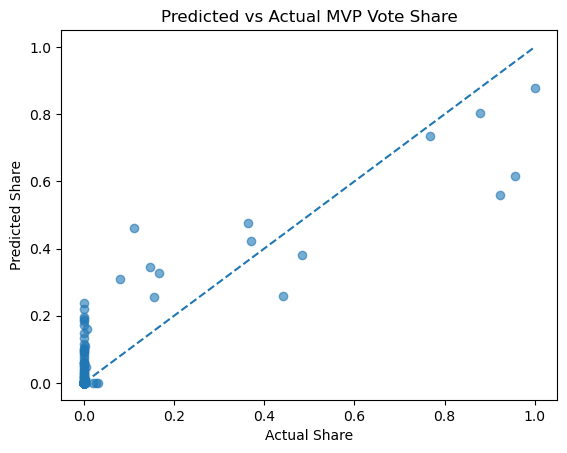

In [378]:
plt.scatter(y_test_share, test_pred_share, alpha=0.6)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Actual Share")
plt.ylabel("Predicted Share")
plt.title("Predicted vs Actual MVP Vote Share")
plt.show()

In [379]:
test_pred = test_pred_share * test_pred_vote

In [380]:
base = np.zeros(len(test_pred))

mae_test = mean_absolute_error(y_test_share, test_pred)
baseline = mean_absolute_error(y_test_share, base)

print("Test MAE:", mae_test)
print("Baseline MAE:", baseline)

Test MAE: 0.0032190633902911283
Baseline MAE: 0.00653954802259887


In [381]:
train.loc[X_test.index, 'pred_share'] = test_pred_share
train.loc[X_test.index, 'pred_votes'] = test_pred_vote
train.loc[X_test.index, 'yhat'] = test_pred

In [382]:
df_val = train.dropna().sort_values(by=['yhat','pred_votes', 'PTS'], ascending=False)

In [387]:
df_val[df_val['Season'] == 2016].head(10)

,Season,Player,MP,PTS,AST,TRB,STL,BLK,TS%,PER,WS,BPM,VORP,USG%,W/L%,Share,has_votes,pred_share,pred_votes,yhat
492,2016,Stephen Curry,34.2,30.1,6.7,5.4,2.1,0.2,0.669,31.5,17.9,11.9,9.5,32.6,0.89,1.000,1,0.876491,1.0,0.876491
494,2016,Kevin Durant,35.8,28.2,5.0,8.2,1.0,1.2,0.634,28.2,14.5,9.9,7.8,30.6,0.671,0.112,1,0.461553,1.0,0.461553
500,2016,Russell Westbrook,34.4,23.5,10.4,7.8,2.0,0.3,0.554,27.6,14.0,7.8,6.8,31.6,0.671,0.371,1,0.421563,1.0,0.421563
506,2016,Kawhi Leonard,33.1,21.2,2.6,6.8,1.8,1.0,0.616,26.0,13.7,9.1,6.7,25.8,0.817,0.484,1,0.381047,1.0,0.381047
493,2016,James Harden,38.1,29.0,7.5,6.1,1.7,0.6,0.598,25.3,13.3,6.6,6.8,32.5,0.5,0.007,1,0.159819,1.0,0.159819
507,2016,Kyle Lowry,37.0,21.2,6.4,4.7,2.1,0.4,0.578,22.2,11.6,5.8,5.7,26.1,0.683,0.005,1,0.046206,1.0,0.046206
497,2016,Damian Lillard,35.7,25.1,6.8,4.0,0.9,0.4,0.560,22.2,9.2,4.4,4.3,31.3,0.537,0.020,1,0.000000,1.0,0.000000
508,2016,Jimmy Butler,36.9,20.9,4.8,5.3,1.6,0.6,0.562,21.3,9.1,4.4,3.9,24.4,0.512,0.000,0,0.000000,1.0,0.000000
512,2016,Brook Lopez,33.7,20.6,2.0,7.8,0.8,1.7,0.562,21.7,6.2,1.3,2.1,27.3,0.256,0.000,0,0.000000,0.0,0.000000
520,2016,Chris Bosh,33.5,19.1,2.4,7.4,0.7,0.6,0.571,20.2,6.4,4.0,2.7,24.7,0.585,0.000,0,0.000000,0.0,0.000000


In [384]:
X_2025 = test[['MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TS%', 'PER', 'WS', 'BPM', 'VORP', 'USG%', 'W/L%']]
pred_2025 = test.copy()
pred_2025['pred_share'] = pipe_class.predict(X_2025) * np.clip(pipe_regr.predict(X_2025), a_min=0, a_max=None)
pred_2025.sort_values(by='pred_share', ascending=False).head(15)

,Season,Player,MP,PTS,AST,TRB,STL,BLK,TS%,PER,WS,BPM,VORP,USG%,W/L%,Share,pred_share
5309,2025,Shai Gilgeous-Alexander,34.2,32.7,6.4,5.0,1.7,1.0,0.637,30.7,16.7,11.5,8.9,34.8,0.829,0.913,0.801050
5311,2025,Nikola Jokić,36.7,29.6,10.2,12.7,1.8,0.6,0.663,32.0,16.4,13.3,9.8,29.5,0.61,0.787,0.738090
5310,2025,Giannis Antetokounmpo,34.2,30.4,6.5,11.9,0.9,1.2,0.625,30.5,11.5,9.5,6.6,35.2,0.585,0.470,0.504411
5314,2025,Jayson Tatum,36.4,26.8,6.0,8.7,1.1,0.5,0.582,21.7,9.5,5.2,4.8,31.2,0.744,0.311,0.197531
5332,2025,Donovan Mitchell,31.4,24.0,5.0,4.5,1.3,0.2,0.575,20.9,7.6,3.7,3.2,30.9,0.78,0.074,0.110259
5371,2025,Evan Mobley,30.5,18.5,3.2,9.3,0.9,1.6,0.633,22.3,9.0,4.6,3.6,23.2,0.78,0.001,0.102472
5345,2025,Jalen Williams,32.4,21.6,5.1,5.3,1.6,0.7,0.573,20.3,7.8,4.0,3.4,27.5,0.829,0.000,0.091030
5327,2025,LeBron James,34.9,24.4,8.2,7.8,1.0,0.6,0.604,22.7,7.7,5.6,4.7,30.1,0.61,0.016,0.084933
5364,2025,Alperen Şengün,31.5,19.1,4.9,10.3,1.1,0.8,0.545,21.4,8.3,4.4,3.9,26.2,0.634,0.000,0.075484
5441,2025,Ty Jerome,19.9,12.5,3.4,2.5,1.1,0.0,0.643,21.0,5.9,4.3,2.2,23.6,0.78,0.000,0.072848


In [386]:
base = np.zeros(len(pred_2025))

mae_test = mean_absolute_error(pred_2025['pred_share'], pred_2025['Share'])
baseline = mean_absolute_error(base, pred_2025['Share'])

print("Test MAE:", mae_test)
print("Baseline MAE:", baseline)

Test MAE: 0.0015881975975316064
Baseline MAE: 0.004569420035149385
